**Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

Notes: Importing essential libraries for data analysis and visualization. Pandas for data manipulation, NumPy for numerical operations, Matplotlib for plotting, yfinance for fetching stock data, and datetime for date handling.

***Set Plot Style***

In [4]:
# Set plot style and figure size
plt.style.use('seaborn-v0_8-whitegrid')  # Updated from 'seaborn-whitegrid'
plt.rcParams['figure.figsize'] = (15, 8)

**Fetch Apple Stock Data**

In [6]:
# Fetch Apple stock data
start_date = '2010-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')
apple_data = yf.download('AAPL', start=start_date, end=end_date)

# Display the first few rows of data
print(f"Data shape: {apple_data.shape}")
apple_data.head()

[*********************100%***********************]  1 of 1 completed

Data shape: (3848, 5)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.440331,6.455077,6.391278,6.422877,493729600
2010-01-05,6.451468,6.487882,6.417462,6.458089,601904800
2010-01-06,6.348846,6.477045,6.342226,6.451466,552160000
2010-01-07,6.337110,6.379844,6.291067,6.372320,477131200
2010-01-08,6.379240,6.379842,6.291368,6.328683,447610800


**Downloading Apple stock data from 2010 to the current date using Yahoo Finance API. We then print the dataset's shape to see how many rows (days) and columns (features) we have, followed by displaying the first 5 rows to inspect the data format.**

**Check Data Quality**

In [8]:
# Check for missing values
print("\nMissing values in the dataset:")
print(apple_data.isnull().sum())


Missing values in the dataset:
Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


**Checking for missing values in our dataset. This is an important data quality step to ensure our analysis won't be affected by incomplete data.**

**Visualize Historical Stock Prices**

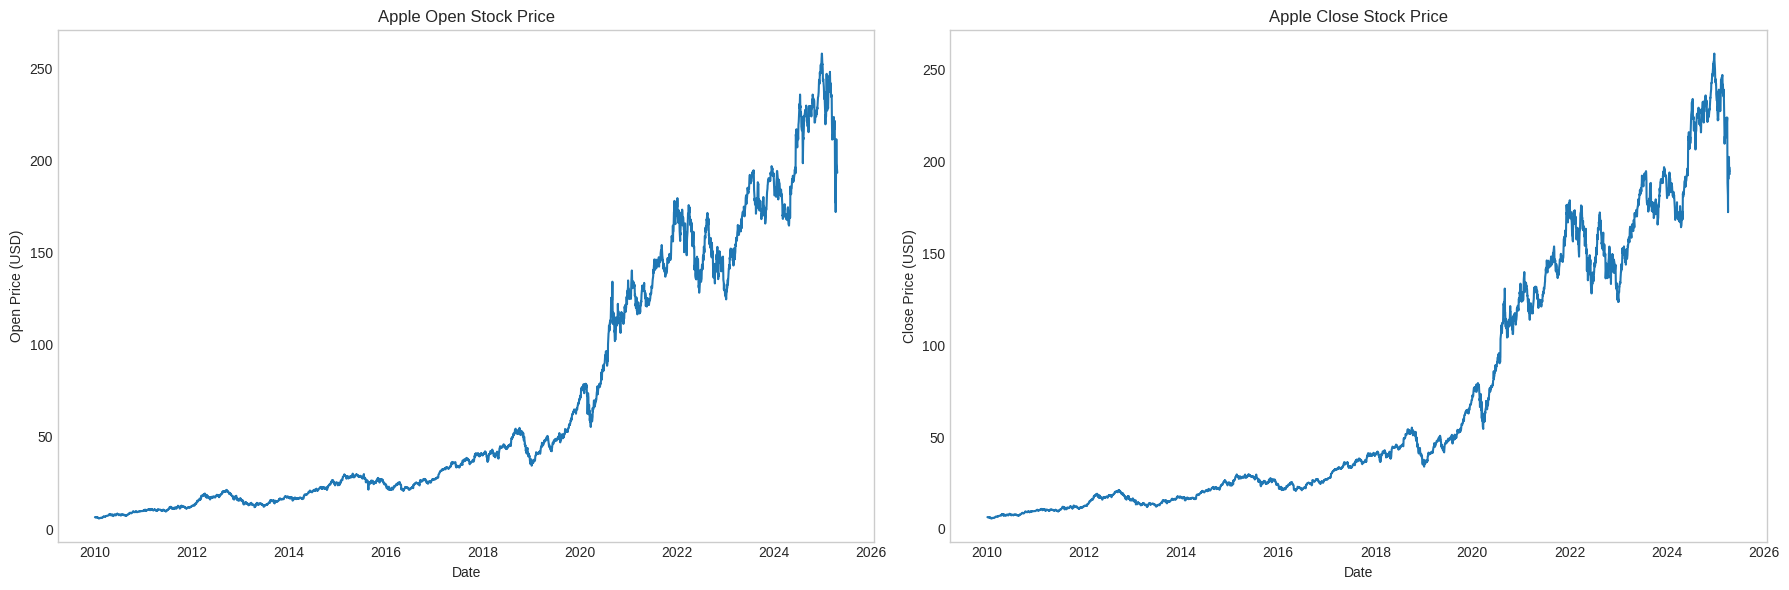

In [9]:
# Plot the full historical data
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(apple_data.index, apple_data['Open'])
plt.xlabel("Date")
plt.ylabel("Open Price (USD)")
plt.title("Apple Open Stock Price")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(apple_data.index, apple_data['Close'])
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.title("Apple Close Stock Price")
plt.grid()
plt.tight_layout()
plt.show()

**Creating a side-by-side visualization of Apple's opening and closing stock prices from 2010 to present. This gives us a long-term view of the stock's performance and patterns over more than a decade.**

**Filter Recent Data and Visualize**

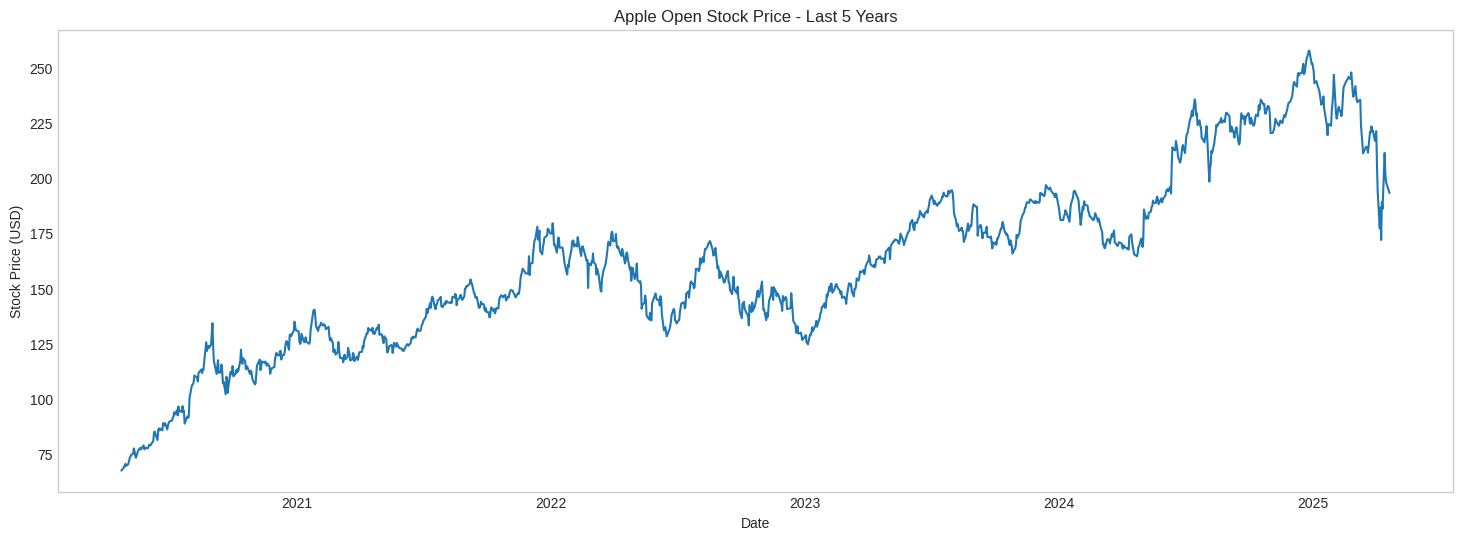

In [10]:
# Filter for the last 5 years of data
five_years_ago = datetime.now() - timedelta(days=5*365)
apple_5years = apple_data[apple_data.index >= five_years_ago]

# Plot the 5-year data
plt.figure(figsize=(18, 6))
plt.plot(apple_5years.index, apple_5years['Open'])
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Apple Open Stock Price - Last 5 Years")
plt.grid()
plt.show()

** Filtering the data to focus on just the last 5 years and visualizing the opening price trend for this more recent period. This gives us a closer look at Apple's recent performance, which might be more relevant for current investment decisions.**

## **Multiple Moving Averages Visualization**

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


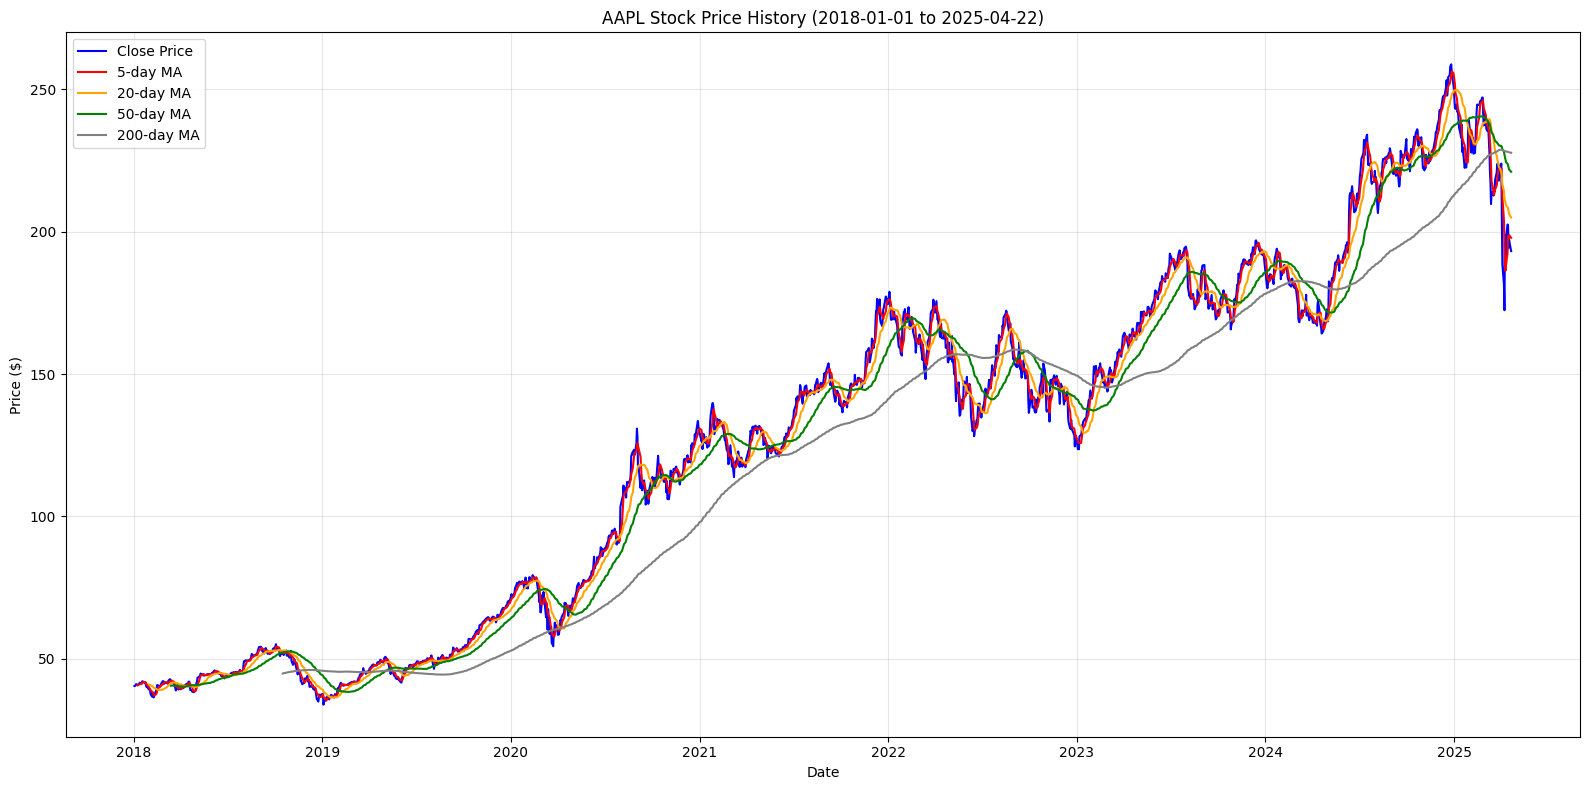

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import seaborn as sns
from scipy import stats

# Define time period
start_date = '2018-01-01'  # Starting from 2018 like in your image
end_date = datetime.now().strftime('%Y-%m-%d')

# Get Apple stock data
apple_data = yf.download('AAPL', start=start_date, end=end_date)

# Calculate different moving averages
apple_data['MA5'] = apple_data['Close'].rolling(window=5).mean()
apple_data['MA20'] = apple_data['Close'].rolling(window=20).mean()
apple_data['MA50'] = apple_data['Close'].rolling(window=50).mean()
apple_data['MA200'] = apple_data['Close'].rolling(window=200).mean()

# Create the plot
plt.figure(figsize=(16, 8))
plt.plot(apple_data.index, apple_data['Close'], color='blue', linewidth=1.5, label='Close Price')
plt.plot(apple_data.index, apple_data['MA5'], color='red', linewidth=1.5, label='5-day MA')
plt.plot(apple_data.index, apple_data['MA20'], color='orange', linewidth=1.5, label='20-day MA')
plt.plot(apple_data.index, apple_data['MA50'], color='green', linewidth=1.5, label='50-day MA')
plt.plot(apple_data.index, apple_data['MA200'], color='gray', linewidth=1.5, label='200-day MA')

# Customize plot
plt.grid(True, alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title(f'AAPL Stock Price History ({start_date} to {end_date})')
plt.legend()
plt.tight_layout()
plt.show()


This visualization shows multiple moving averages (5, 20, 50, and 200-day) overlaid on the closing price, similar to your reference image. Moving averages of different timeframes help identify short, medium, and long-term trends. The 5-day and 20-day MAs respond quickly to price changes, while the 50-day and 200-day MAs reflect longer-term trends. Crossovers between these lines often signal potential trend changes - particularly when shorter MAs cross longer ones.

## **Daily Returns Distribution with Normal Fit**

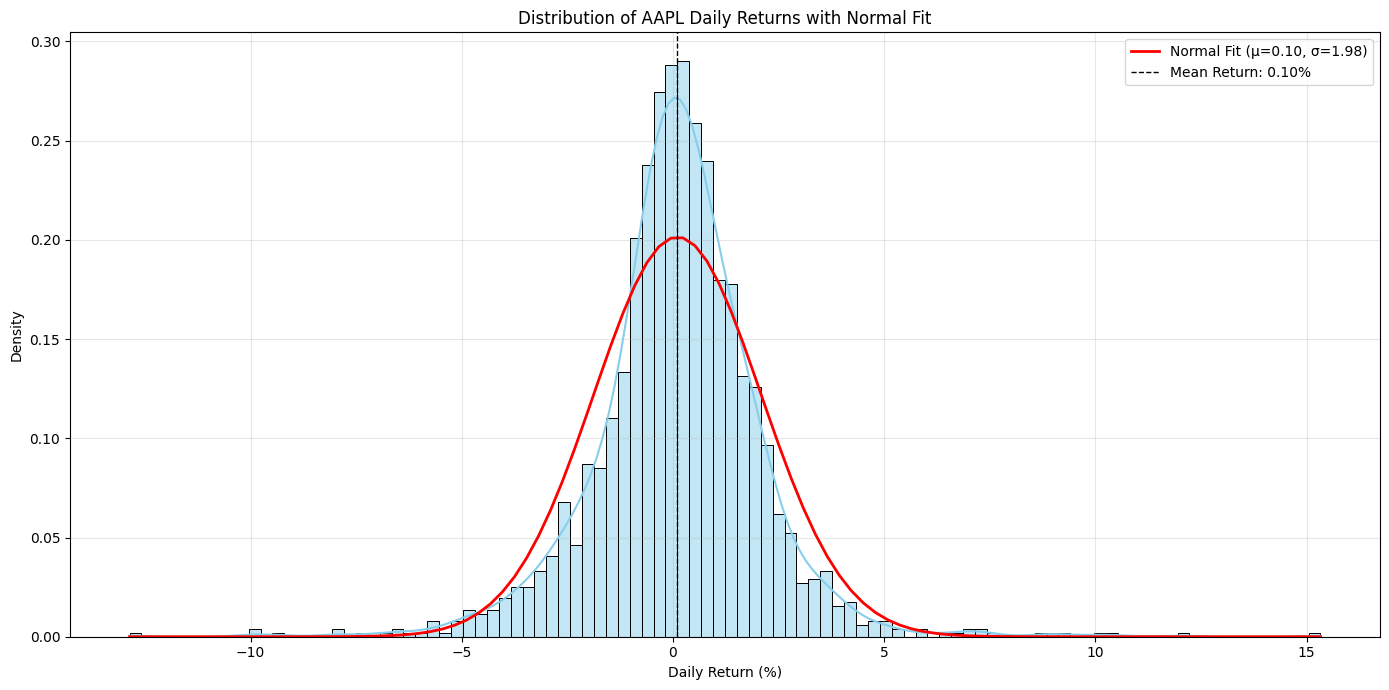

Daily Returns Statistics:
count    1834.000000
mean        0.104822
std         1.980469
min       -12.864684
25%        -0.817788
50%         0.118702
75%         1.151755
max        15.328853
Name: Daily_Return, dtype: float64

Skewness: 0.1376
Kurtosis: 6.3724
Jarque-Bera test p-value: 0.000000


In [ ]:
# Calculate daily returns
apple_data['Daily_Return'] = apple_data['Close'].pct_change() * 100
returns = apple_data['Daily_Return'].dropna()

# Create plot
plt.figure(figsize=(14, 7))

# Histogram of returns
sns.histplot(returns, bins=100, kde=True, color='skyblue', stat='density')

# Add normal distribution fit
mu, sigma = stats.norm.fit(returns)
x = np.linspace(returns.min(), returns.max(), 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'r-', linewidth=2, label=f'Normal Fit (μ={mu:.2f}, σ={sigma:.2f})')

# Add vertical line at mean
plt.axvline(returns.mean(), color='black', linestyle='--', linewidth=1, label=f'Mean Return: {returns.mean():.2f}%')

# Customize plot
plt.title('Distribution of AAPL Daily Returns with Normal Fit')
plt.xlabel('Daily Return (%)')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Add descriptive statistics
print("Daily Returns Statistics:")
print(returns.describe())
print(f"\nSkewness: {returns.skew():.4f}")
print(f"Kurtosis: {returns.kurtosis():.4f}")
print(f"Jarque-Bera test p-value: {stats.jarque_bera(returns)[1]:.6f}")


*   Returns distribution exhibits "fat tails" - extreme returns occur more
frequently than in normal distribution

*  
Slightly positive mean daily return (0.10%) indicates overall upward trend
*   Standard deviation of 1.98% quantifies day-to-day volatility


